🧠 Gamma and Regularization in SVM 

Support Vector Machine (SVM) is a powerful classifier, but its behavior depends heavily on hyperparameters — especially C (regularization) and gamma.

🔹 1️⃣ Regularization in SVM (C Parameter)

📌 What Is C?

C is the regularization parameter in SVM.

It controls:

How much the model cares about classification errors

🔹 High C (Low Regularization)

Model tries to classify all training points correctly

***Decision boundary becomes complex***

***Risk of overfitting***

📌 Think:

“Don’t allow mistakes!”

🔹 Low C (High Regularization)

Model allows some misclassification

Decision boundary becomes smoother

Better generalization

📌 Think:

“It’s okay to make a few mistakes.”

🧠 Simple Analogy

High C → strict teacher

Low C → relaxed teacher

🔹 2️⃣ Gamma in SVM (Kernel Parameter)

Gamma applies mainly to non-linear kernels, especially RBF (Gaussian kernel).

📌 What Is Gamma?

Gamma controls:

How far the influence of a single data point reaches

🔹 High Gamma

Each point affects only its nearby region

Decision boundary becomes very wiggly

High risk of overfitting

📌 Think:

“Only close neighbors matter.”

🔹 Low Gamma

Each point influences a large area

Decision boundary is smoother

Risk of underfitting

📌 Think:

“Everything affects everything.”

🔄 How C and Gamma Work Together (VERY IMPORTANT)

| C        | Gamma    | Model Behavior |
| -------- | -------- | -------------- |
| High     | High     | Overfitting    |
| Low      | Low      | Underfitting   |
| High     | Low      | Medium         |
| Low      | High     | Medium         |
| Balanced | Balanced | Good model     |

🧠 Visual Intuition

C controls margin width (strict vs flexible)

Gamma controls curve complexity (smooth vs wiggly)

🔹 Why Only Some SVMs Have Gamma

| Kernel     | Gamma Used? |
| ---------- | ----------- |
| Linear     | ❌ No        |
| Polynomial | ✅ Yes       |
| RBF        | ✅ Yes       |
| Sigmoid    | ✅ Yes       |


![image.png](image(1).png)
 finding optimal margin/hyperplane



![image.png](image(2).png)
gamma is related to kernel

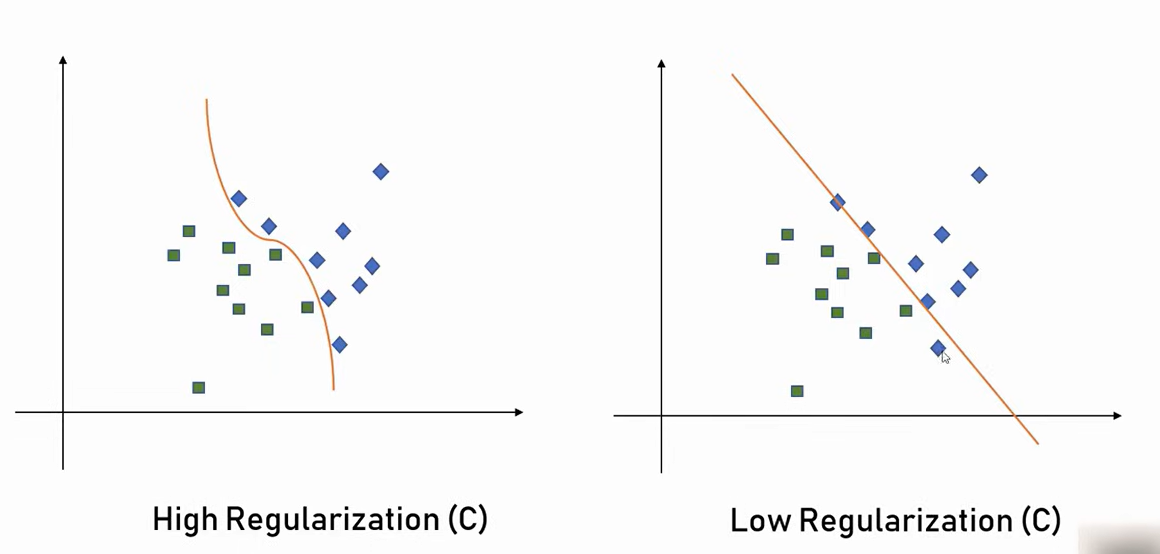

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['flower_names']=df['target'].apply(lambda x: iris.target_names[x])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [17]:
x=df.drop(['target','flower_names'],axis='columns')
y=df.target

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn.svm import SVC
model=SVC()

In [20]:
model.fit(x_train,y_train)

SVC()

In [21]:
model.score(x_test,y_test)

0.9333333333333333